# real_data_rippler

## preamble

In [1]:
# importing numpy
import numpy as np
from numpy import random

In [2]:
# importing plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [3]:
# importing storage for results
import zarr

In [4]:
# importing pandas
import pandas as pd

## real data

In [5]:
# loading in functions for simulation
%run '../../function_scripts/model/UC_simulation.py'

In [6]:
# importing the csv - only the important columns
data_real = pd.read_csv("../../Antidote_household.csv", usecols=["hid","pid","date","age","sex","hiv","hivChild","cpt","result","week"])

# converting the pid to integers (and saving lists of sex and age)
pid_unique = []
no_individuals = 0
test_individuals = []
sex = []
age = []
for i in range(1659):
    pid = data_real['pid'][i]
    if pid in pid_unique:
        test_individuals.append(pid_unique.index(pid))
    else:
        pid_unique.append(pid)
        test_individuals.append(no_individuals)
        sex.append(data_real['sex'][i])
        age.append(data_real['age'][i])
        no_individuals += 1
sex = np.array(sex)
age = np.array(age)

# calculating N and T
N = no_individuals
T = int(max(data_real['week']))

# making a test result matrix (for the real test results)
test_results_real = np.tile(np.nan,(T+1,N))
for i in range(1659):
    j = test_individuals[i]
    t = int(data_real['week'][i])
    test_results_real[t,j] = data_real['result'][i]

# converting the hid to integers
hid_unique = []
no_houses = 0
test_houses = []
for hid in data_real['hid'] :
    if hid in hid_unique:
        test_houses.append(hid_unique.index(hid))
    else:
        hid_unique.append(hid)
        test_houses.append(no_houses)
        no_houses += 1

# list of which house each individual is in
house_list = []
for i in range(N):
    test_no = test_individuals.index(i)
    house_list.append(test_houses[test_no])

# making a household mixing matrix
h = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if house_list[i]==house_list[j]:
            h[i,j] = 1

/tmp/ipykernel_823280/1894879290.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
/tmp/ipykernel_823280/1894879290.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")


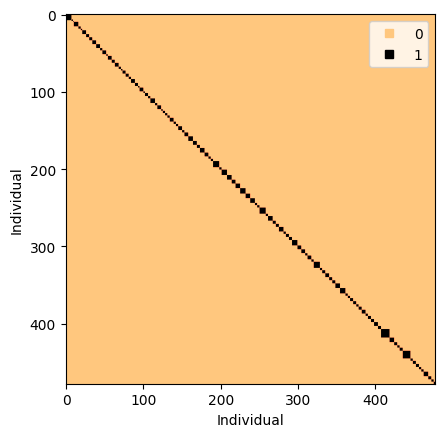

In [21]:
# plotting h
plt.imshow(h,cmap="copper_r")
colour0 = '#ffc77e'
plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
colour1 = '#000000'
plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
plt.legend(loc="upper right", scatterpoints=1)
#plt.title("Household Mixing Matrix")
plt.ylabel("Individual")
plt.xlabel("Individual")
%plt.savefig("plots/plots/h.pdf")
plt.show()

In [8]:
# calculating house sizes
i = 0
h_sum = np.int32(np.sum(h,axis=0))
house_sizes = []
while i<N:
    house_sizes.append(h_sum[i])
    i += h_sum[i]
print(house_sizes)

[7, 2, 1, 6, 3, 2, 5, 4, 4, 5, 5, 3, 5, 2, 5, 4, 5, 3, 2, 4, 4, 3, 5, 4, 2, 5, 2, 4, 3, 6, 3, 5, 2, 3, 3, 3, 5, 3, 3, 5, 3, 5, 6, 5, 4, 6, 5, 3, 3, 8, 3, 7, 6, 5, 6, 7, 6, 6, 3, 3, 8, 3, 6, 4, 4, 6, 3, 4, 4, 7, 5, 5, 3, 5, 3, 8, 3, 4, 5, 4, 4, 6, 7, 3, 3, 4, 4, 3, 4, 5, 3, 4, 4, 5, 4, 11, 6, 4, 3, 4, 10, 3, 4, 4, 3, 3, 6, 4, 3, 3]


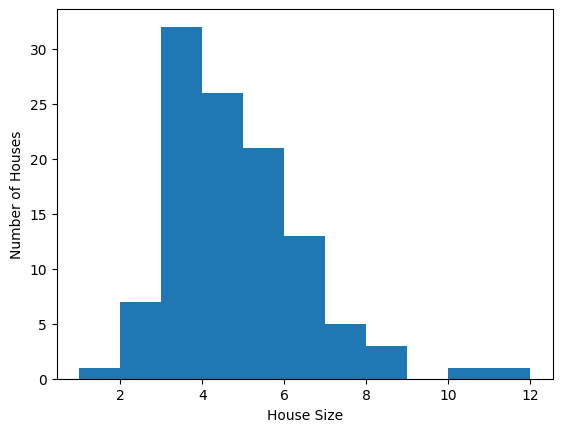

In [9]:
# plotting house size
plt.hist(house_sizes,density=0,bins=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel("Number of Houses")
plt.xlabel("House Size")
plt.savefig("plots/plots/houses.pdf")
plt.show()

In [10]:
#proportion of sex=1
np.mean(sex)

0.401673640167364

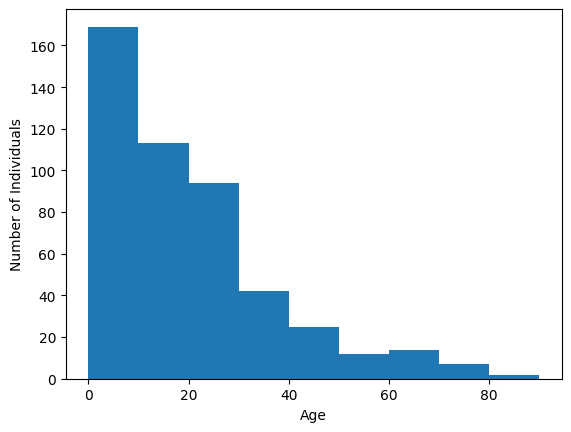

In [11]:
# plotting age
plt.hist(age,density=0,bins=[0,10,20,30,40,50,60,70,80,90])
plt.ylabel("Number of Individuals")
plt.xlabel("Age")
#plt.savefig("plots/age.pdf")
plt.show()

In [12]:
# average age
np.mean(age)

20.2496427334205

In [7]:
# centring age and sex
age = age - np.mean(age)
sex = sex - np.mean(sex)

In [8]:
# assumed true values
gamma = 0.5
sens = 0.8
spec = 0.99

In [9]:
# seasonality modifiers
seasonality_mode = 2
seasonal_period = 52
t_ast = 17

# resulting matrices
seasonal_vector = np.array([1 - np.cos(2*np.pi*(t+t_ast)/seasonal_period) for t in range(T+1)])
seasonal_matrix_G = np.tile(seasonal_vector, (N,1)).T
seasonal_matrix_H = np.tile(1, (T+1,N))

/tmp/ipykernel_823280/2580616533.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
/tmp/ipykernel_823280/2580616533.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
/tmp/ipykernel_823280/2580616533.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")


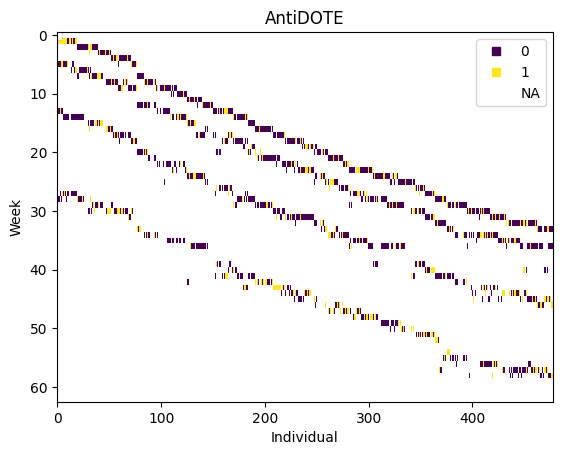

In [10]:
# looking at the test result matrix
plt.imshow(test_results_real,cmap="viridis",interpolation="nearest",aspect="auto")
colour0 = '#440154'
plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
colour1 = '#fae622'
plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
colour2 = '#ffffff'
plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")
plt.legend(loc="upper right", scatterpoints=1)
plt.title(r'AntiDOTE')
plt.ylabel("Week")
plt.xlabel("Individual")
#plt.savefig("plots/test_results_real.pdf")
plt.show()

/tmp/ipykernel_823280/2589344304.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
/tmp/ipykernel_823280/2589344304.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
/tmp/ipykernel_823280/2589344304.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")


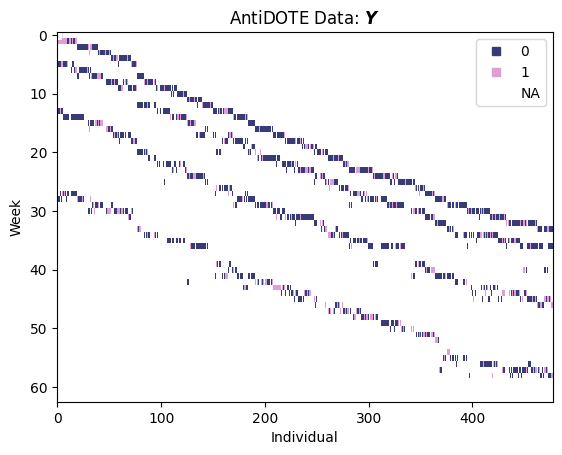

In [11]:
# looking at the test result matrix
plt.imshow(test_results_real,cmap="tab20b",interpolation="nearest",aspect="auto")
colour0 = '#393b79'
plt.plot(0, 0, "-", color=colour0, label="0", linestyle='', marker="s")
colour1 = '#de9ed6'
plt.plot(0, 0, "-", color=colour1, label="1", linestyle='', marker="s")
colour2 = '#ffffff'
plt.plot(0, 0, "-", color=colour2, label="NA", linestyle='', marker="s")
plt.legend(loc="upper right", scatterpoints=1)
plt.title(r'AntiDOTE Data: $\boldsymbol{Y}$')
plt.ylabel("Week")
plt.xlabel("Individual")
#plt.savefig("plots/test_results_real_for_poster.pdf")
plt.show()

## inference information

In [15]:
# hyperparameters of priors
mu = np.array([0.001,0.001,0.001,0.001])
prior_X_0 = 0.35

In [16]:
# starting values
theta_start = np.array([0.5,0.5,0,0])
X_start = UC_sim(N,h,age,sex,prior_X_0,theta_start,gamma,0,sens,spec,T,seasonality_mode,seasonal_period,t_ast,1)['X']
covariance_start = 0.8*0.000001*np.identity(4)
scaling = 1.2

In [17]:
# MCMC iterations
K = 100000
K_latent = 400

## acceptance rates

In [42]:
# importing the saved acceptance rates
MCMC_noncentred_acc = zarr.open('./MCMC_output/acc.zarr', mode='r')

# printing the acceptance rates
print("acc_theta:", MCMC_noncentred_acc[0])
print("acc_initial:", MCMC_noncentred_acc[1])
print("acc_latent:", MCMC_noncentred_acc[2])

# removing the acceptance rates from memory
del(MCMC_noncentred_acc)

acc_theta: 0.3125
acc_initial: 0.38614
acc_latent: 0.602020175


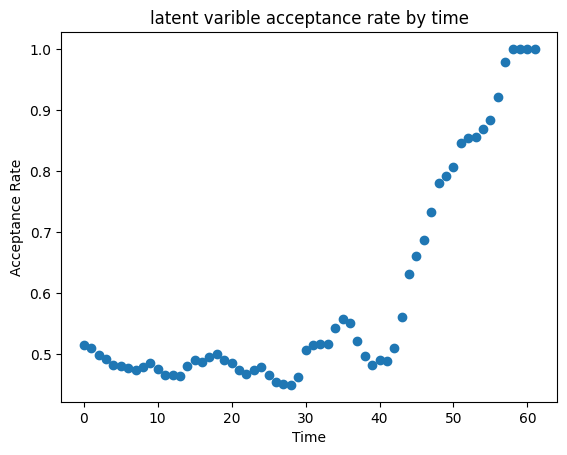

In [43]:
# importing the saved acceptance rates
MCMC_noncentred_acc_latent_times = zarr.open('./MCMC_output/acc_latent_times.zarr', mode='r')

# plotting the acceptance rate at each point in time
plt.scatter(range(T),MCMC_noncentred_acc_latent_times[:])
lobf = np.polyfit(range(T),MCMC_noncentred_acc_latent_times[:],1)
plt.title("latent varible acceptance rate by time")
plt.xlabel("Time")
plt.ylabel("Acceptance Rate")
plt.show()

# removing the acceptance rates from memory
del(MCMC_noncentred_acc_latent_times)

## parameters

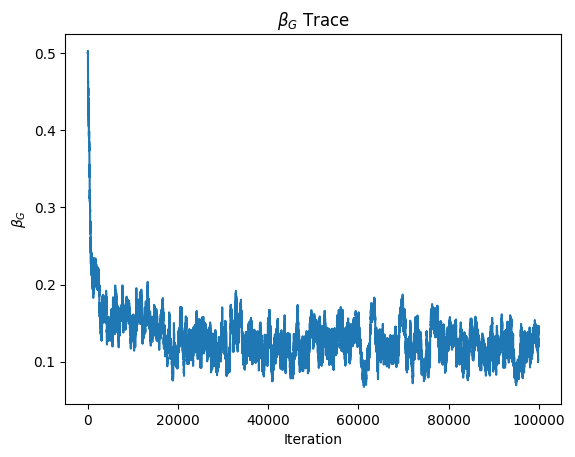

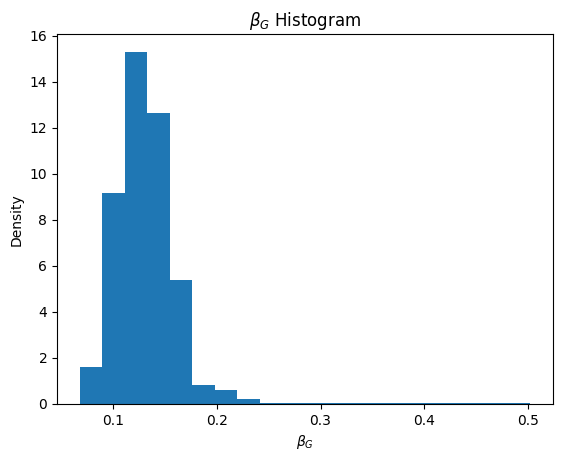

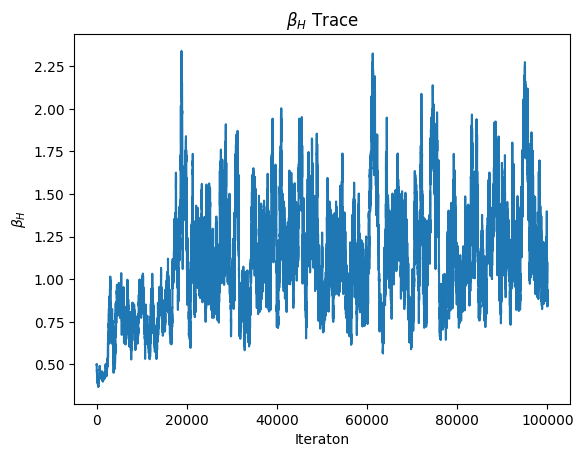

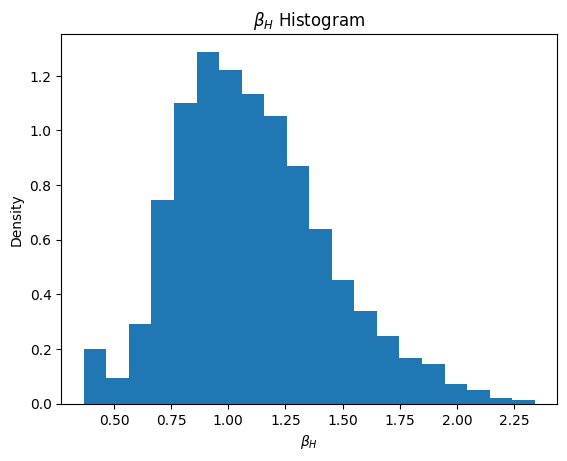

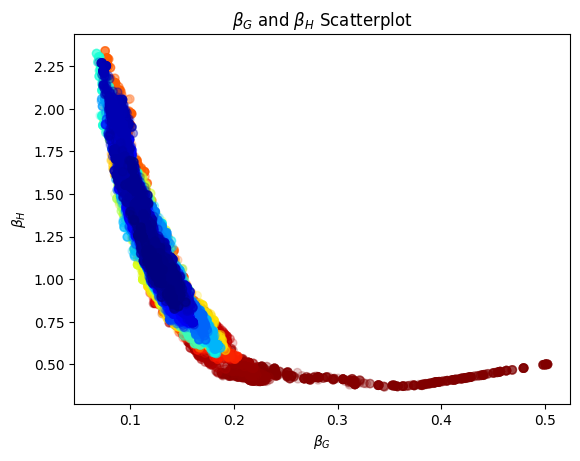

In [214]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# trace plot and histogram of beta_G
plt.plot(MCMC_noncentred_theta[:,0])
plt.title(r'$\beta_G$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\beta_G$')
plt.show()
plt.hist(MCMC_noncentred_theta[:,0],density=1,bins=20)
plt.title(r'$\beta_G$ Histogram')
plt.xlabel(r'$\beta_G$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of beta_H
plt.plot(MCMC_noncentred_theta[:,1])
plt.title(r'$\beta_{H}$ Trace')
plt.xlabel("Iteraton")
plt.ylabel(r'$\beta_{H}$')
plt.show()
plt.hist(MCMC_noncentred_theta[:,1],density=1,bins=20)
plt.title(r'$\beta_{H}$ Histogram')
plt.xlabel(r'$\beta_{H}$')
plt.ylabel("Density")
plt.show()

# correlation plot of beta_G vs beta_H
plt.scatter(MCMC_noncentred_theta[:,0],MCMC_noncentred_theta[:,1],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_G \text{ and } \beta_{H}$ Scatterplot')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\beta_{H}$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

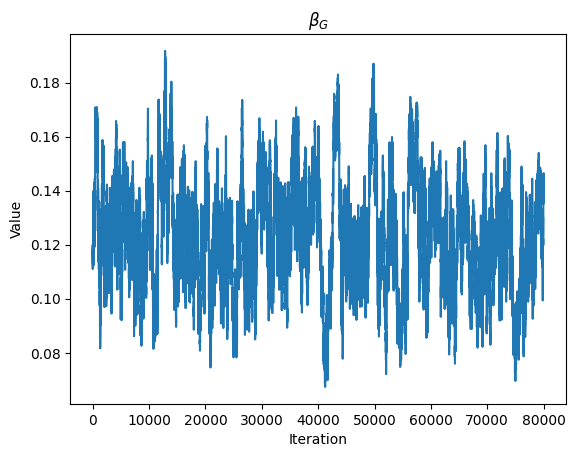

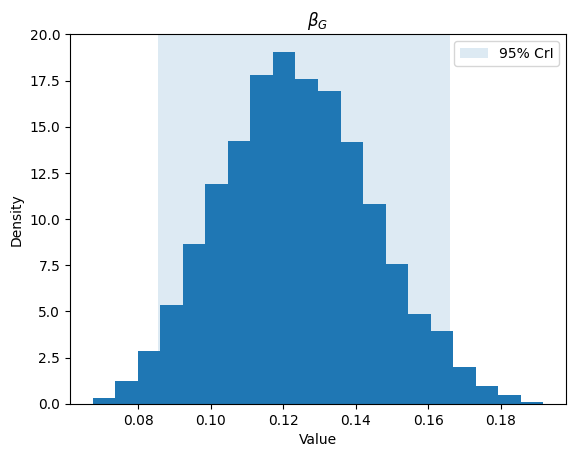

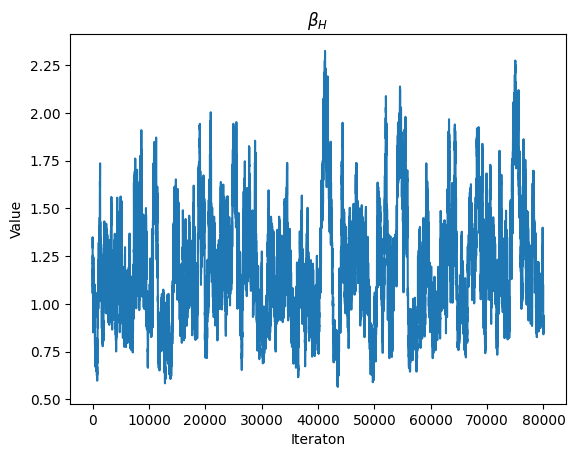

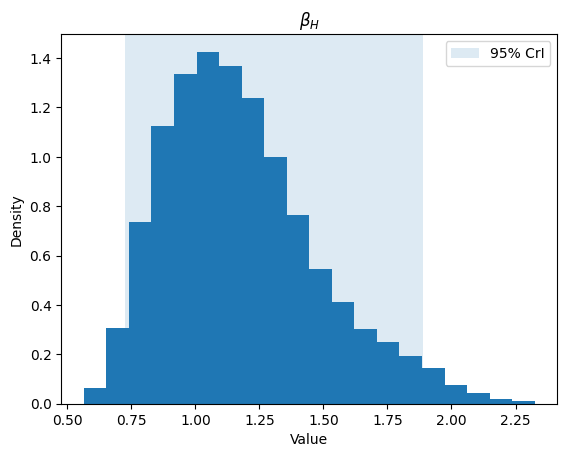

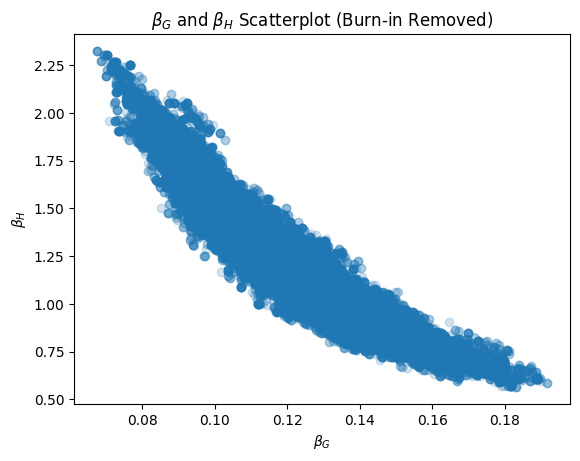

beta_G: [0.0853233  0.12303613 0.16602548]
beta_H: [0.72333095 1.13512699 1.88897331]


In [215]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# trace plot and histogram of beta_G
plt.plot(MCMC_noncentred_theta[20000:,0])
plt.title(r'$\beta_G$')
plt.xlabel("Iteration")
plt.ylabel("Value")
#plt.savefig("plots/beta_G_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[20000:,0],density=1,bins=20)
plt.axvspan(np.quantile(MCMC_noncentred_theta[20000:,0],0.025),np.quantile(MCMC_noncentred_theta[20000:,0],0.975),alpha=0.15,label="95% CrI")
plt.legend()
plt.title(r'$\beta_G$')
plt.xlabel("Value")
plt.ylabel("Density")
#plt.savefig("plots/beta_G_hist.pdf")
plt.show()

# trace plot and histogram of beta_H
plt.plot(MCMC_noncentred_theta[20000:,1])
plt.title(r'$\beta_{H}$')
plt.xlabel("Iteraton")
plt.ylabel("Value")
#plt.savefig("plots/beta_H_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[20000:,1],density=1,bins=20)
plt.axvspan(np.quantile(MCMC_noncentred_theta[20000:,1],0.025),np.quantile(MCMC_noncentred_theta[20000:,1],0.975),alpha=0.15,label="95% CrI")
plt.legend()
plt.title(r'$\beta_{H}$')
plt.xlabel("Value")
plt.ylabel("Density")
#plt.savefig("plots/beta_H_hist.pdf")
plt.show()

# correlation plot of beta_G vs beta_H
plt.scatter(MCMC_noncentred_theta[20000:,0],MCMC_noncentred_theta[20000:,1],alpha=0.2)
plt.title(r'$\beta_G \text{ and } \beta_{H}$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\beta_{H}$')
plt.show()

# median and 95% credible intervals
print("beta_G:", np.quantile(MCMC_noncentred_theta[20000:,0],[0.025,0.5,0.975]))
print("beta_H:", np.quantile(MCMC_noncentred_theta[20000:,1],[0.025,0.5,0.975]))

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

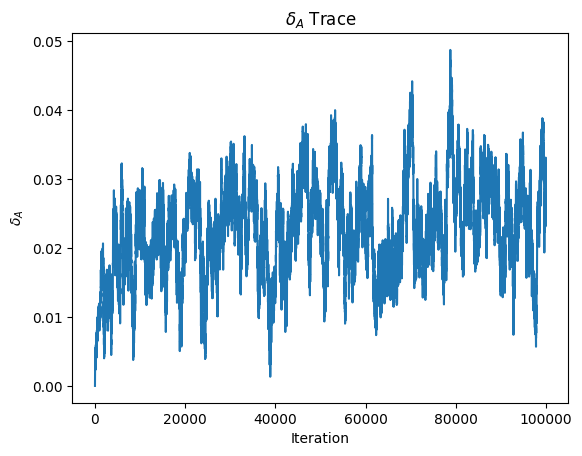

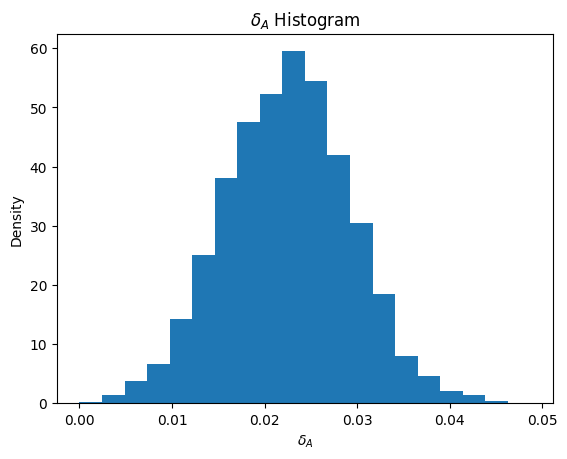

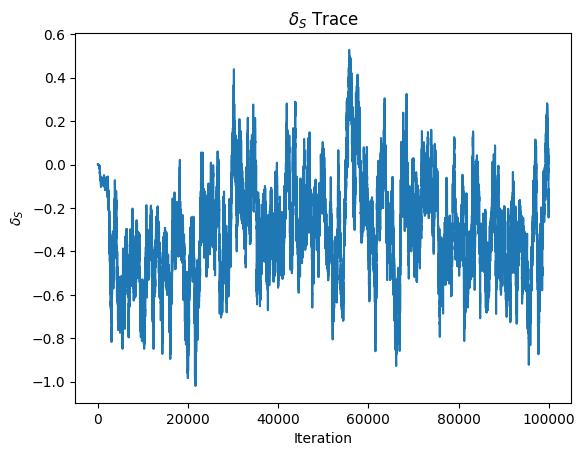

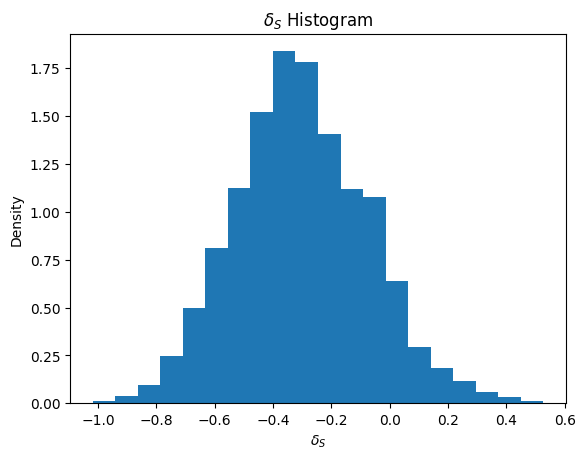

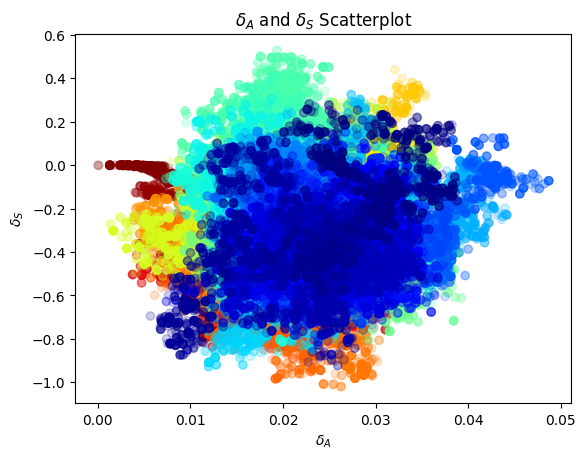

In [46]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('../../../../luna/MCMC_noncentred_real/theta.zarr', mode='r')

# trace plot and histogram of delta_A
plt.plot(MCMC_noncentred_theta[:,2])
plt.title(r'$\delta_A$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_A$')
plt.show()
plt.hist(MCMC_noncentred_theta[:,2],density=1,bins=20)
plt.title(r'$\delta_A$ Histogram')
plt.xlabel(r'$\delta_A$')
plt.ylabel("Density")
plt.show()

# trace plot and histogram of delta_S
plt.plot(MCMC_noncentred_theta[:,3])
plt.title(r'$\delta_S$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$\delta_S$')
plt.show()
plt.hist(MCMC_noncentred_theta[:,3],density=1,bins=20)
plt.title(r'$\delta_S$ Histogram')
plt.xlabel(r'$\delta_S$')
plt.ylabel("Density")
plt.show()

# correlation plot of deltas
plt.scatter(MCMC_noncentred_theta[:,2],MCMC_noncentred_theta[:,3],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\delta_A \text{ and } \delta_S$ Scatterplot')
plt.xlabel(r'$\delta_A$')
plt.ylabel(r'$\delta_S$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

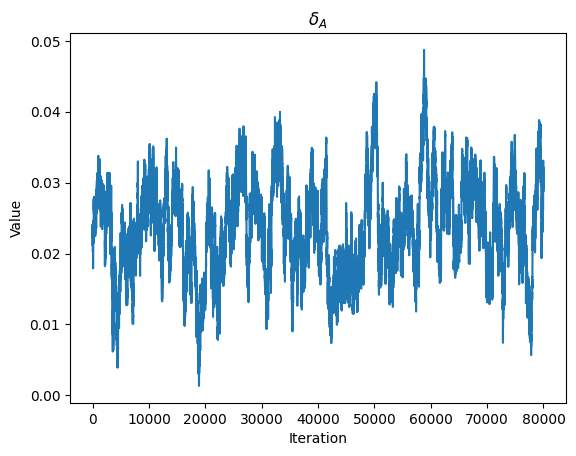

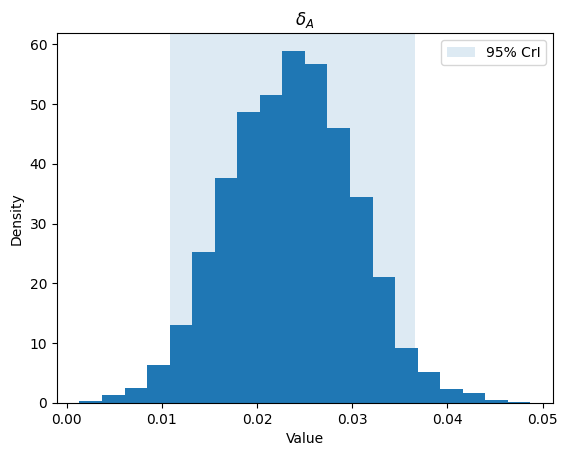

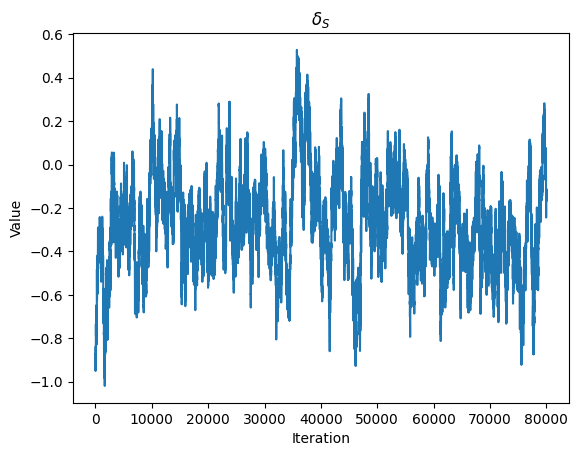

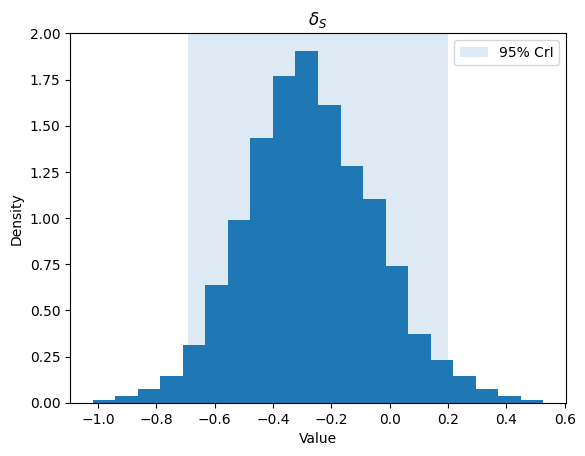

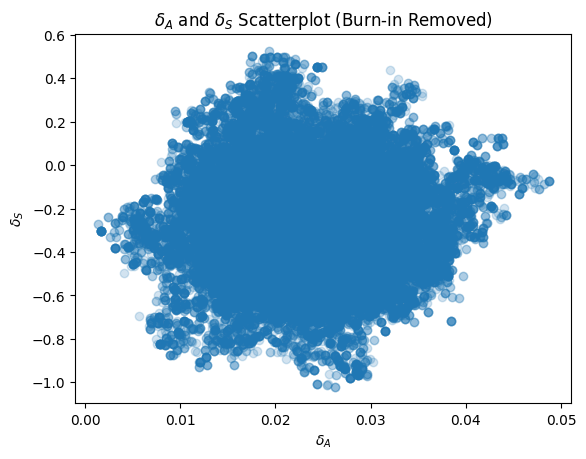

delta_A: [0.01089353 0.02366947 0.03659558]
delta_S: [-0.6910461  -0.28219916  0.1995222 ]


In [55]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# trace plot and histogram of delta_A
plt.plot(MCMC_noncentred_theta[20000:,2])
plt.title(r'$\delta_A$')
plt.xlabel("Iteration")
plt.ylabel("Value")
#plt.savefig("plots/delta_A_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[20000:,2],density=1,bins=20)
plt.axvspan(np.quantile(MCMC_noncentred_theta[20000:,2],0.025),np.quantile(MCMC_noncentred_theta[20000:,2],0.975),alpha=0.15,label="95% CrI")
plt.legend()
plt.title(r'$\delta_A$')
plt.xlabel("Value")
plt.ylabel("Density")
#plt.savefig("plots/delta_A_hist.pdf")
plt.show()

# trace plot and histogram of delta_S
plt.plot(MCMC_noncentred_theta[20000:,3])
plt.title(r'$\delta_S$')
plt.xlabel("Iteration")
plt.ylabel("Value")
#plt.savefig("plots/delta_S_trace.pdf")
plt.show()
plt.hist(MCMC_noncentred_theta[20000:,3],density=1,bins=20)
plt.axvspan(np.quantile(MCMC_noncentred_theta[20000:,3],0.025),np.quantile(MCMC_noncentred_theta[20000:,3],0.975),alpha=0.15,label="95% CrI")
plt.legend()
plt.title(r'$\delta_S$')
plt.xlabel("Value")
plt.ylabel("Density")
#plt.savefig("plots/delta_S_hist.pdf")
plt.show()

# correlation plot of deltas
plt.scatter(MCMC_noncentred_theta[20000:,2],MCMC_noncentred_theta[20000:,3],alpha=0.2)
plt.title(r'$\delta_A \text{ and } \delta_S$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\delta_A$')
plt.ylabel(r'$\delta_S$')
plt.show()

# median and 95% credible intervals
print("delta_A:", np.quantile(MCMC_noncentred_theta[20000:,2],[0.025,0.5,0.975]))
print("delta_S:", np.quantile(MCMC_noncentred_theta[20000:,3],[0.025,0.5,0.975]))

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

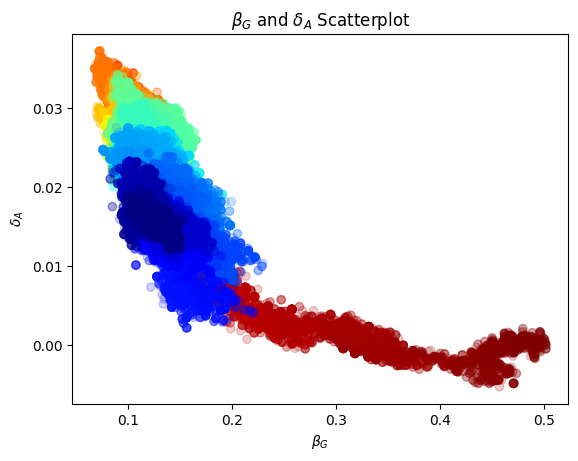

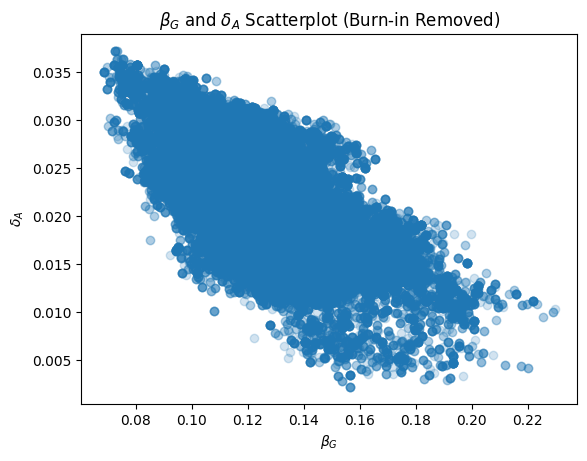

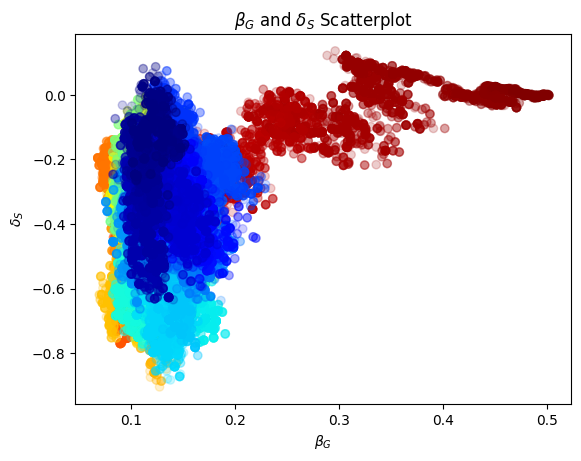

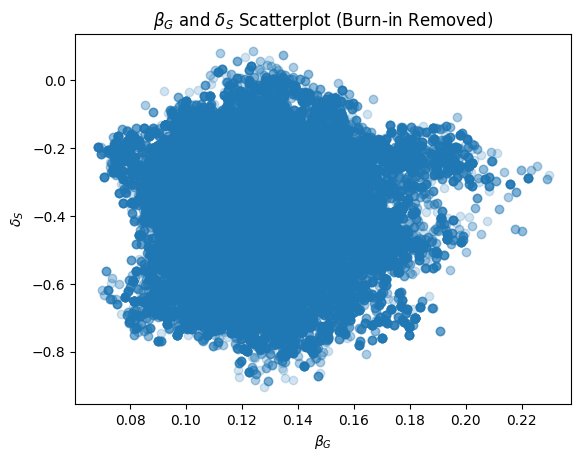

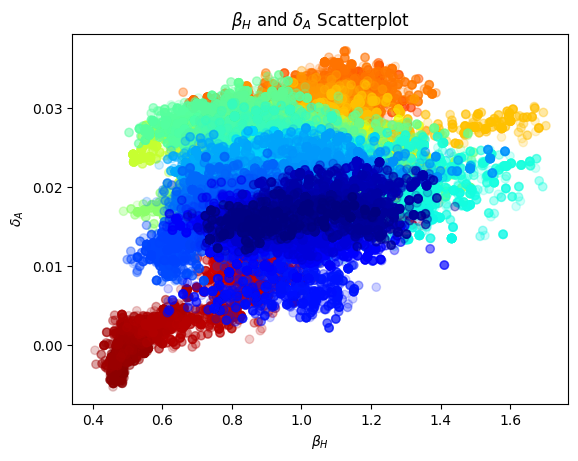

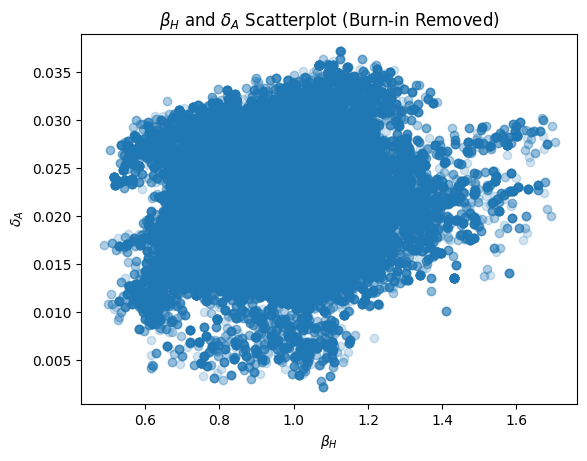

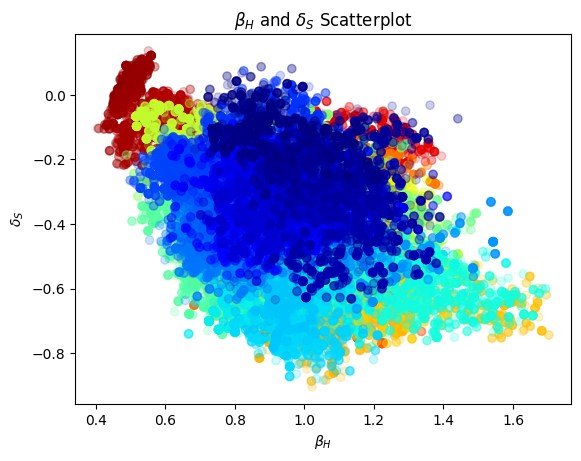

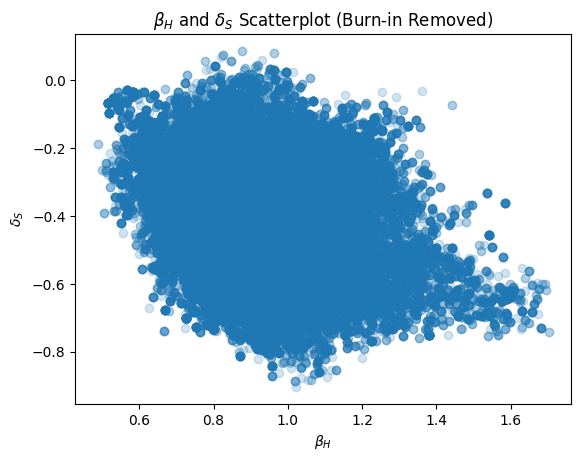

In [25]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# correlation plot of beta_G vs delta_A
plt.scatter(MCMC_noncentred_theta[:,0],MCMC_noncentred_theta[:,2],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_G \text{ and } \delta_A$ Scatterplot')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_A$')
plt.show()
plt.scatter(MCMC_noncentred_theta[10000:,0],MCMC_noncentred_theta[10000:,2],alpha=0.2)
plt.title(r'$\beta_G \text{ and } \delta_A$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_A$')
plt.show()

# correlation plot of beta_G vs delta_S
plt.scatter(MCMC_noncentred_theta[:,0],MCMC_noncentred_theta[:,3],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_G \text{ and } \delta_S$ Scatterplot')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_S$')
plt.show()
plt.scatter(MCMC_noncentred_theta[10000:,0],MCMC_noncentred_theta[10000:,3],alpha=0.2)
plt.title(r'$\beta_G \text{ and } \delta_S$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_G$')
plt.ylabel(r'$\delta_S$')
plt.show()

# correlation plot of beta_H vs delta_A
plt.scatter(MCMC_noncentred_theta[:,1],MCMC_noncentred_theta[:,2],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_H \text{ and } \delta_A$ Scatterplot')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_A$')
plt.show()
plt.scatter(MCMC_noncentred_theta[10000:,1],MCMC_noncentred_theta[10000:,2],alpha=0.2)
plt.title(r'$\beta_H \text{ and } \delta_A$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_A$')
plt.show()

# correlation plot of beta_H vs delta_S
plt.scatter(MCMC_noncentred_theta[:,1],MCMC_noncentred_theta[:,3],alpha=0.2,color=plt.cm.jet(np.linspace(1,0,K)))
plt.title(r'$\beta_H \text{ and } \delta_S$ Scatterplot')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_S$')
plt.show()
plt.scatter(MCMC_noncentred_theta[10000:,1],MCMC_noncentred_theta[10000:,3],alpha=0.2)
plt.title(r'$\beta_H \text{ and } \delta_S$ Scatterplot (Burn-in Removed)')
plt.xlabel(r'$\beta_H$')
plt.ylabel(r'$\delta_S$')
plt.show()

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

In [22]:
# importing the saved run of theta
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# calculating MSJD
MSJD_beta_G = (np.sum((MCMC_noncentred_theta[1:,0] - MCMC_noncentred_theta[:-1,0])**2) + (theta_start[0]-MCMC_noncentred_theta[0,0])**2)/K
MSJD_beta_H = (np.sum((MCMC_noncentred_theta[1:,1] - MCMC_noncentred_theta[:-1,1])**2) + (theta_start[1]-MCMC_noncentred_theta[0,1])**2)/K
MSJD_delta_A = (np.sum((MCMC_noncentred_theta[1:,2] - MCMC_noncentred_theta[:-1,2])**2) + (theta_start[2]-MCMC_noncentred_theta[0,2])**2)/K
MSJD_delta_S = (np.sum((MCMC_noncentred_theta[1:,3] - MCMC_noncentred_theta[:-1,3])**2) + (theta_start[3]-MCMC_noncentred_theta[0,3])**2)/K

# printing MSJD
print("MSJDs")
print("beta_G:", MSJD_beta_G)
print("beta_H:", MSJD_beta_H)
print("delta_A:", MSJD_delta_A)
print("delta_S:", MSJD_delta_S)

# removing the traces of theta from memory
del(MCMC_noncentred_theta)

MSJDs
beta_G: 4.09582106391004e-06
beta_H: 0.0005895033810237914
delta_A: 3.4611730906097643e-07
delta_S: 0.0003122698005703079


## latent variables

In [107]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# finding the quantiles
quantile_array = np.zeros((T+1,3))
for t in range(T+1):
    #print(t, end='\r')
    quantile_array[t] = np.quantile(np.sum(MCMC_noncentred_X[20000:,t,:],axis=-1),[0.025,0.5,0.975])

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

In [108]:
quantile_array[20]

array([109., 136., 163.])

In [104]:
lambda_G = quantile_array[:,1] * np.array([1-np.cos(2*np.pi*(t+17)/52) for t in range(T+1)]) * (1/N) * 0.12303613
print(np.max(lambda_G))
print(np.min(lambda_G))

0.08463160258187759
0.0


In [105]:
lambda_H = 0.12303613 * 1.13512699
print(lambda_H)

0.1396616319081487


In [218]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# finding the quantiles
rates = np.quantile(np.sum(MCMC_noncentred_X[20000:,20,:],axis=-1)*(1-np.cos(2*np.pi*(20+17)/52))*(1/N)*MCMC_noncentred_theta[20000:,0],[0.025,0.5,0.975])
probs = 1-np.exp(-rates)
print(rates)
print(probs)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)
del(MCMC_noncentred_theta)

[0.02714345 0.04311901 0.06340975]
[0.02677837 0.0422026  0.06144118]


In [219]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# finding the quantiles
rates = np.quantile(np.sum(MCMC_noncentred_X[20000:,20,:],axis=-1)*(1-np.cos(2*np.pi*37/52))*(1/N)*MCMC_noncentred_theta[20000:,0] + MCMC_noncentred_theta[20000:,0]*MCMC_noncentred_theta[20000:,1],[0.025,0.5,0.975])
probs = 1-np.exp(-rates)
print(rates)
print(probs)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)
del(MCMC_noncentred_theta)

[0.16048443 0.18351163 0.20933961]
[0.14826892 0.1676578  0.18888028]


In [224]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# finding the quantiles
comparison = np.quantile((np.sum(MCMC_noncentred_X[20000:,20,:],axis=-1)*(1-np.cos(2*np.pi*37/52))*(1/N)*MCMC_noncentred_theta[20000:,0] + MCMC_noncentred_theta[20000:,0]*MCMC_noncentred_theta[20000:,1])/(np.sum(MCMC_noncentred_X[20000:,20,:],axis=-1)*(1-np.cos(2*np.pi*(20+17)/52))*(1/N)*MCMC_noncentred_theta[20000:,0]),[0.025,0.5,0.975])
print(comparison)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)
del(MCMC_noncentred_theta)

[2.94701447 4.23943285 6.69911148]


In [220]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# finding the quantiles
quantile_array_rates = np.zeros((T+1,3))
for t in range(T+1):
    print(t, end='\r')
    quantile_array_rates[t] = np.quantile(np.sum(MCMC_noncentred_X[20000:,t,:],axis=-1)*(1-np.cos(2*np.pi*(t+17)/52))*(1/N)*MCMC_noncentred_theta[20000:,0],[0.025,0.5,0.975])

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)
del(MCMC_noncentred_theta)

In [221]:
quantile_array_rates

array([[4.27179144e-02, 6.35838939e-02, 8.69488327e-02],
       [4.82472695e-02, 7.09361643e-02, 9.79325764e-02],
       [4.87173972e-02, 7.18416790e-02, 1.01183730e-01],
       [4.94434188e-02, 7.37962266e-02, 1.05009622e-01],
       [5.00317962e-02, 7.56256654e-02, 1.09341628e-01],
       [5.03569609e-02, 7.74104595e-02, 1.13073103e-01],
       [5.10161374e-02, 7.90552989e-02, 1.15532376e-01],
       [5.14006316e-02, 8.02103992e-02, 1.17306857e-01],
       [5.08904433e-02, 8.01084485e-02, 1.17841099e-01],
       [4.99364053e-02, 7.91199028e-02, 1.17271232e-01],
       [4.88619028e-02, 7.84542308e-02, 1.16626557e-01],
       [4.81525647e-02, 7.70619841e-02, 1.14356085e-01],
       [4.65179515e-02, 7.46134028e-02, 1.11458905e-01],
       [4.50692215e-02, 7.21205356e-02, 1.08046463e-01],
       [4.33000961e-02, 6.93566375e-02, 1.04031228e-01],
       [4.13516035e-02, 6.63035200e-02, 9.99260128e-02],
       [3.84265225e-02, 6.17206042e-02, 9.28147038e-02],
       [3.56357792e-02, 5.71029

In [222]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')
MCMC_noncentred_theta = zarr.open('./MCMC_output/theta.zarr', mode='r')

# finding the quantiles
quantile_array_comparison = np.zeros((T+1,3))
for t in range(T+1):
    print(t, end='\r')
    quantile_array_comparison[t] = np.quantile((np.sum(MCMC_noncentred_X[20000:,t,:],axis=-1)*(1-np.cos(2*np.pi*(t+17)/52))*(1/N)*MCMC_noncentred_theta[20000:,0] + MCMC_noncentred_theta[20000:,0]*MCMC_noncentred_theta[20000,1])/(np.sum(MCMC_noncentred_X[20000:,t,:],axis=-1)*(1-np.cos(2*np.pi*(t+17)/52))*(1/N)*MCMC_noncentred_theta[20000:,0]),[0.025,0.5,0.975])

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)
del(MCMC_noncentred_theta)

/tmp/ipykernel_3656766/1945711964.py:9: RuntimeWarning: divide by zero encountered in divide
  quantile_array_comparison[t] = np.quantile((np.sum(MCMC_noncentred_X[20000:,t,:],axis=-1)*(1-np.cos(2*np.pi*(t+17)/52))*(1/N)*MCMC_noncentred_theta[20000:,0] + MCMC_noncentred_theta[20000:,0]*MCMC_noncentred_theta[20000,1])/(np.sum(MCMC_noncentred_X[20000:,t,:],axis=-1)*(1-np.cos(2*np.pi*(t+17)/52))*(1/N)*MCMC_noncentred_theta[20000:,0]),[0.025,0.5,0.975])
/home/neillj/.pyenv/versions/3.9.10/lib/python3.9/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [230]:
quantile_array_comparison

array([[   3.21386216,    3.51695044,    3.85707887],
       [   2.96507644,    3.25703065,    3.58157101],
       [   2.90976797,    3.20357843,    3.58614413],
       [   2.84488781,    3.14677855,    3.54833425],
       [   2.78814639,    3.09720873,    3.51665048],
       [   2.73804607,    3.05306693,    3.46985495],
       [   2.70253886,    3.01306481,    3.44333821],
       [   2.67150563,    2.97637144,    3.39880197],
       [   2.67102404,    2.99237482,    3.42820681],
       [   2.67393185,    3.01089216,    3.47741914],
       [   2.68918735,    3.03144099,    3.50653606],
       [   2.72661021,    3.06738854,    3.55482161],
       [   2.77820725,    3.1338487 ,    3.64526699],
       [   2.83514362,    3.20463563,    3.73742257],
       [   2.90869559,    3.29559334,    3.83123179],
       [   2.98999135,    3.39336797,    3.9518205 ],
       [   3.14025721,    3.56830865,    4.18294662],
       [   3.32341391,    3.78155186,    4.46474004],
       [   3.53202199,    4.

In [172]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# picking a random MCMC iteration
random.seed(123)
iterations = random.randint(20000,100000,5)
print(iterations)
random_path_0 = np.sum(MCMC_noncentred_X[iterations[0],:,:],axis=-1)
random_path_1 = np.sum(MCMC_noncentred_X[iterations[1],:,:],axis=-1)
random_path_2 = np.sum(MCMC_noncentred_X[iterations[2],:,:],axis=-1)
random_path_3 = np.sum(MCMC_noncentred_X[iterations[3],:,:],axis=-1)
random_path_4 = np.sum(MCMC_noncentred_X[iterations[4],:,:],axis=-1)

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

[35725 48030 37730 81404 83206]


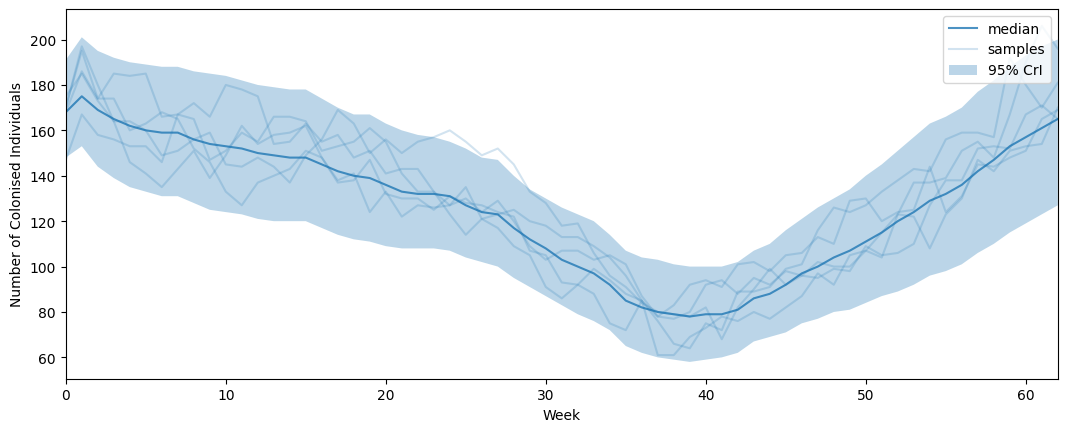

In [173]:
# 95% credible interval and median vs true (burn-in removed)
plt.figure(figsize=(12.8,4.8))
plt.plot(quantile_array[:,1], alpha=0.8, label="median")
plt.plot(random_path_0, alpha=0.2, color="tab:blue", label="samples")
plt.plot(random_path_1, alpha=0.2, color="tab:blue")
plt.plot(random_path_2, alpha=0.2, color="tab:blue")
plt.plot(random_path_3, alpha=0.2, color="tab:blue")
plt.plot(random_path_4, alpha=0.2, color="tab:blue")
plt.fill_between(range(T+1), quantile_array[:,0], quantile_array[:,2], alpha=0.3, label="95% CrI")
plt.legend(loc="upper right")
#plt.title("Number of Colonised Individuals (Burn-in Removed)")
plt.xlabel("Week")
plt.ylabel("Number of Colonised Individuals")
plt.xlim(0,62)
#plt.savefig("plots/colonised.pdf")
plt.show()

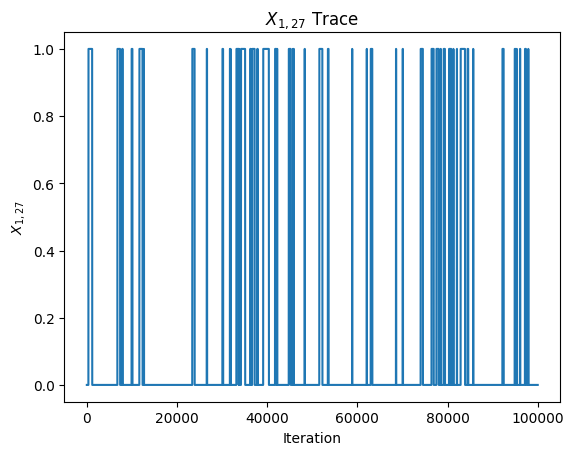

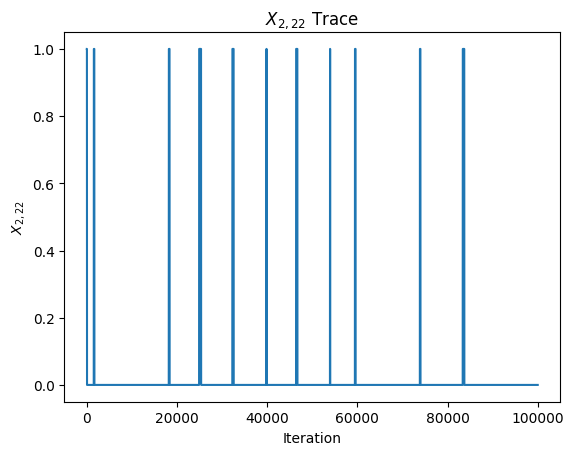

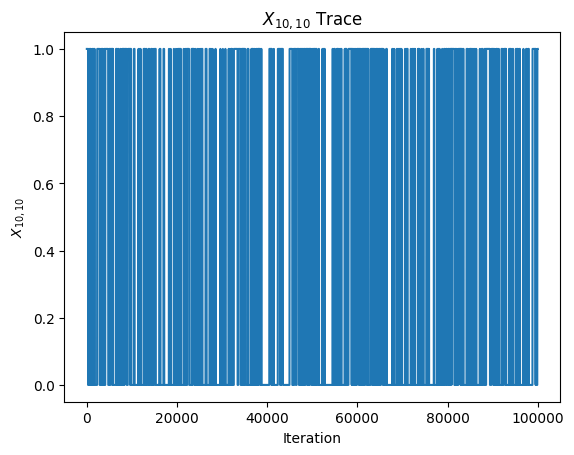

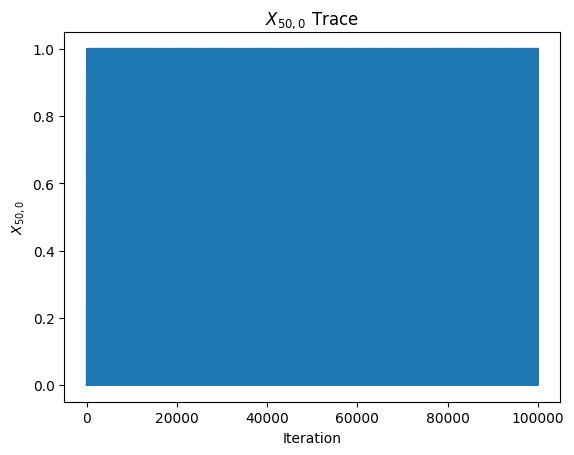

In [29]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# Trace plots of elements of X
plt.plot(MCMC_noncentred_X[:,1,27])
plt.title(r'$X_{1,27}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{1,27}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,2,22])
plt.title(r'$X_{2,22}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{2,22}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,10,10])
plt.title(r'$X_{10,10}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{10,10}$')
plt.show()
plt.plot(MCMC_noncentred_X[:,50,0])
plt.title(r'$X_{50,0}$ Trace')
plt.xlabel("Iteration")
plt.ylabel(r'$X_{50,0}$')
plt.show()

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

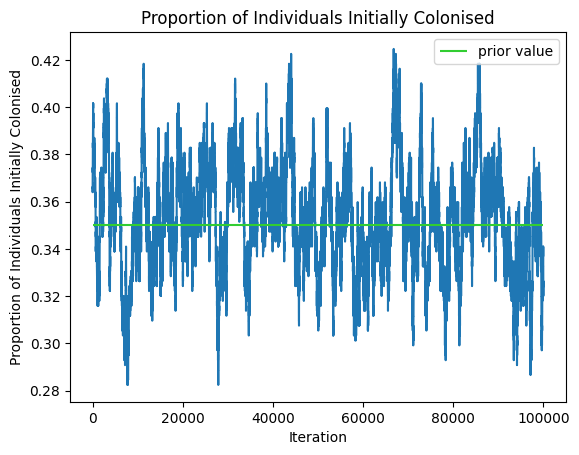

In [23]:
# importing the saved run of the X matrices resulting from the latent variables
MCMC_noncentred_X = zarr.open('./MCMC_output/X.zarr', mode='r')

# proportion of individuals colonised at time 0
plt.plot(np.average(MCMC_noncentred_X[:,0,:],axis=1))
plt.hlines(prior_X_0,0,K,colors="limegreen",label="prior value")
plt.legend(loc = "upper right")
plt.title("Proportion of Individuals Initially Colonised")
plt.xlabel("Iteration")
plt.ylabel("Proportion of Individuals Initially Colonised")
plt.show()

# removing the traces of the latent variables from memory
del(MCMC_noncentred_X)

## end